## Loading Data 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv


In [2]:
df = pd.read_csv('../input/used-car-dataset-ford-and-mercedes/bmw.csv')

# Exploring Data

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
df.shape

(10781, 9)

In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [7]:
df['transmission'].value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [8]:
df['fuelType'].value_counts()

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

In [9]:
df['model'].value_counts()

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 Z4           108
 6 Series     108
 X6           106
 7 Series     106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

# Visualizing Data

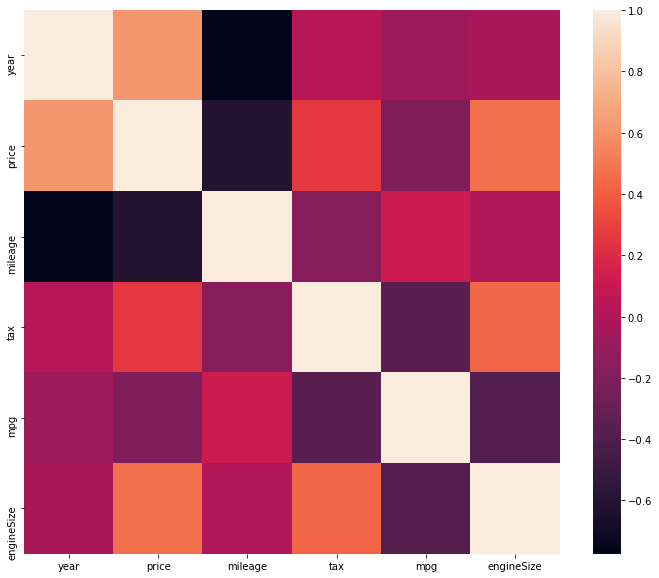

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


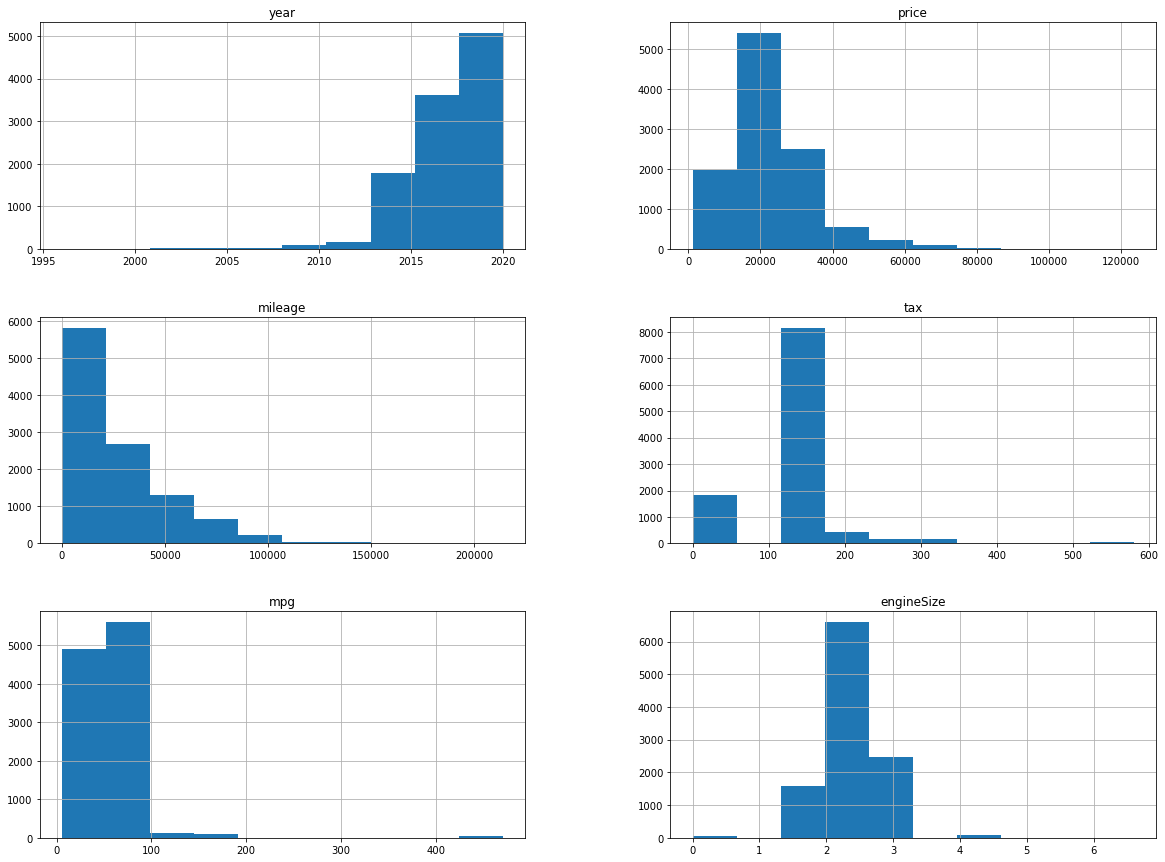

In [11]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

## One Hot Encoding 

In [12]:
df = pd.get_dummies(data=df, columns=['model','transmission','fuelType'])

In [13]:
df.shape

(10781, 38)

# Split Data 

In [14]:
X = df.drop('price',axis=1)
y = df['price']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33)

# Model One-> Ridge

In [16]:
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.linear_model import Ridge

In [17]:
model_1 = Ridge(alpha=1.0)
model_1.fit(X_train, y_train)

Ridge()

In [18]:
model_1.score(X_test,y_test)

0.8521892962136148

In [19]:
y_pred = model_1.predict(X_test) 
np.sqrt(MSE(y_test, y_pred)) 

4388.041205168437

# Model Two -> Xgboost

In [20]:
import xgboost as xg 

In [21]:
model_2 = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
  
model_2.fit(X_train, y_train) 


[15:30:39] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
model_2.score(X_test,y_test)

0.9113866818341764

In [23]:
y_pred = model_2.predict(X_test) 
  
np.sqrt(MSE(y_test, y_pred)) 

3397.5609331263104

# Model Three -> ElasticNet

In [24]:
from sklearn.linear_model import ElasticNet
model_3 = ElasticNet(random_state=0)
model_3.fit(X_train, y_train)

ElasticNet(random_state=0)

In [25]:
y_pred = model_3.predict(X_test)   
np.sqrt(MSE(y_test, y_pred)) 

7283.778520105231

#  Model Four -> NN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [28]:
model = Sequential()

model.add(Dense(38,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/600
226/226 [==============================] - 1s 4ms/step - loss: 555846765.5330 - val_loss: 443057888.0000
Epoch 2/600
226/226 [==============================] - 0s 2ms/step - loss: 409419189.1454 - val_loss: 305507456.0000
Epoch 3/600
226/226 [==============================] - 0s 2ms/step - loss: 281819641.0925 - val_loss: 176316704.0000
Epoch 4/600
226/226 [==============================] - 0s 2ms/step - loss: 180851012.2291 - val_loss: 111261504.0000
Epoch 5/600
226/226 [==============================] - 0s 2ms/step - loss: 126551164.9692 - val_loss: 88195424.0000
Epoch 6/600
226/226 [==============================] - 0s 2ms/step - loss: 122542913.5154 - val_loss: 80518176.0000
Epoch 7/600
226/226 [==============================] - 0s 2ms/step - loss: 115682756.9339 - val_loss: 78337544.0000
Epoch 8/600
226/226 [==============================] - 0s 2ms/step - loss: 105871660.0881 - val_loss: 76402024.0000
Epoch 9/600
226/226 [==============================] - 0s 2ms/step -

<AxesSubplot:>

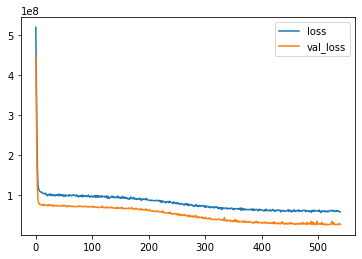

In [30]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [31]:
y_pred = model.predict(X_test)

In [32]:
np.sqrt(MSE(y_test,y_pred))

5156.151217503966